<a href="https://colab.research.google.com/github/BaberFaisal/NFA_Work/blob/main/Baber_Faisal_HW2_GEODS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Geospatial Home Work 2**

**Installing Necessary Packages**

In [2]:
pip install earthengine-api


In [2]:
!earthengine authenticate

Authenticate: Limited support in Colab. Use ee.Authenticate() or --auth_mode=notebook instead.
W1213 16:39:28.814224 132968357363712 _default.py:683] No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=4RCNQkMAAf-HnyVA5xD6-DqKDOgrkuuaupi6x-EK8P8&tc=vyW3teIN9IFLgXPYx0bfL1SamiKmsTICTLfsdmb2KVI&cc=OjRYL98_cdBmfwOA-2HSS5OeOekQf9iCWGUdoYEufM0

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: Traceback (most recent call las

In [3]:
pip install geemap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00


In [4]:
pip install gdal

In [2]:
!pip install rasterio

**Importing Libraries**

In [5]:
import ee
import geemap
import numpy as np
import rasterio
from rasterio.enums import Resampling
from scipy.linalg import block_diag
from scipy.ndimage import gaussian_filter
from skimage.transform import resize
import matplotlib.pyplot as plt

Authenticate to Earth Engine

In [ ]:
ee.Authenticate() # Authenticate within the Python script

# Initialize the Earth Engine API
ee.Initialize()

# Define Area of Interest (AOI)
aoi = ee.Geometry.Rectangle([-115.5, 53.5, -114.5, 54.5])  # Example area

# Define Date Range
start_date = '2022-01-01'
end_date = '2022-01-31'

# Initialize the Earth Engine API
ee.Initialize()

# Define Area of Interest (AOI)
aoi = ee.Geometry.Rectangle([-115.5, 53.5, -114.5, 54.5])  # Example area

# Define Date Range
start_date = '2022-01-01'
end_date = '2022-01-31'

# Get Landsat-8 Dataset
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterDate(start_date, end_date) \
    .filterBounds(aoi) \
    .select(['SR_B4', 'SR_B3', 'SR_B2', 'SR_B5'])  # Red, Green, Blue, NIR bands

# Visualize and Download
Map = geemap.Map(center=[53.5, -115], zoom=8)
Map.addLayer(landsat.mean(), {'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'min': 0, 'max': 3000}, "Landsat-8")
Map.addLayer(modis.mean(), {'bands': ['sur_refl_b01', 'sur_refl_b02'], 'min': 0, 'max': 5000}, "MODIS")
Map

# Export to Google Drive
landsat_image = landsat.mean().clip(aoi)
modis_image = modis.mean().clip(aoi)

geemap.ee_export_image(landsat_image, filename="landsat_image.tif", scale=30, region=aoi, file_per_band=False)
geemap.ee_export_image(modis_image, filename="modis_image.tif", scale=500, region=aoi, file_per_band=False)


Process to Initialize Earth Engine

In [ ]:
ee.Initialize()

# Define Area of Interest (AOI)
aoi = ee.Geometry.Rectangle([-115.5, 53.5, -114.5, 54.5])  # Example area

# Define Date Range
start_date = '2022-01-01'
end_date = '2023-01-31'

# Get Landsat-8 Dataset
landsat = ee.ImageCollection("LANDSAT/LC08/C02/T1_L2") \
    .filterDate(start_date, end_date) \
    .filterBounds(aoi) \
    .select(['SR_B4', 'SR_B3', 'SR_B2', 'SR_B5'])  # Red, Green, Blue, NIR bands

# Visualize and Download
# The following line will handle authentication automatically
Map = geemap.Map(center=[53.5, -115], zoom=8)
Map.addLayer(landsat.mean(), {'bands': ['SR_B4', 'SR_B3', 'SR_B2'], 'min': 0, 'max': 3000}, "Landsat-8")
Map.addLayer(modis.mean(), {'bands': ['sur_refl_b01', 'sur_refl_b02'], 'min': 0, 'max': 5000}, "MODIS")
Map

# Export to Google Drive
landsat_image = landsat.mean().clip(aoi)
modis_image = modis.mean().clip(aoi)

geemap.ee_export_image(landsat_image, filename="landsat_image.tif", scale=30, region=aoi, file_per_band=False)
geemap.ee_export_image(modis_image, filename="modis_image.tif", scale=500, region=aoi, file_per_band=False)

Authenticate: Limited support in Colab. Use ee.Authenticate() or --auth_mode=notebook instead.
Authenticate: Credentials already exist.  Use --force to refresh.
Generating URL ...
An error occurred while downloading.
Total request size (496576512 bytes) must be less than or equal to 50331648 bytes.
Generating URL ...
Please wait ...
Data downloaded to /content/modis_image.tif


In [ ]:
from osgeo import gdal

# Path to the GeoTIFF file
geotiff_path = "modis_image.tif"

# Open the GeoTIFF file
dataset = gdal.Open(geotiff_path)

# Extract metadata and properties
metadata = dataset.GetMetadata()
geo_transform = dataset.GetGeoTransform()
projection = dataset.GetProjection()
band_count = dataset.RasterCount
dimensions = (dataset.RasterXSize, dataset.RasterYSize)

# Print the results
print("Metadata:", metadata)
print("Geo-Transform:", geo_transform)
print("Projection:", projection)
print("Number of Bands:", band_count)
print("Dimensions (Width x Height):", dimensions)


Load satellite imagery

In [7]:
# Landsat data (high-resolution)
landsat_path = '/content/Dataset.tif'
# MODIS data (low-resolution)
modis_path = '/content/Dataset 2.tif'

Load Landsat dataset

In [8]:
def load_landsat(path):
    with rasterio.open(path) as src:
        landsat_data = src.read()
        landsat_meta = src.meta
    return landsat_data, landsat_meta

In [9]:
# Function to clean TIFF files
def clean_tiff(path):
    with rasterio.open(path) as src:
        # Check for extra samples and handle them
        data = src.read()
        profile = src.profile

In [12]:
# Function to clean TIFF files
def clean_tiff(path):
    with rasterio.open(path) as src:
        # Check for extra samples and handle them
        data = src.read()
        profile = src.profile
        # Remove extra samples
        if "extra_samples" in profile:
            print(f"Removing extra samples from {path}")
            profile.pop("extra_samples", None)
        # Ensure dtype matches the data
        profile.update(dtype=data.dtype, count=data.shape[0])
    # Save the cleaned file
    cleaned_path = path.replace('.tif', '_cleaned.tif')
    with rasterio.open(cleaned_path, 'w', **profile) as dst:
        dst.write(data)
    return cleaned_path

In [13]:
# Load Landsat dataset
def load_landsat(path):
    with rasterio.open(path) as src:
        landsat_data = src.read()
        landsat_meta = src.meta
    return landsat_data, landsat_meta

In [14]:
# Load MODIS dataset
def load_modis(path):
    with rasterio.open(path) as src:
        modis_data = src.read(indexes=1)  # Only read the first band if multiple bands exist
    return modis_data

In [15]:
# Preprocess images patchwise (resize MODIS to match Landsat spatial resolution per patch)
def preprocess_images_patchwise(landsat, modis, patch_size):
    h, w = landsat.shape[1:]
    patches = []
    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            landsat_patch = landsat[:, i:i+patch_size, j:j+patch_size]
            modis_patch = resize(modis, landsat_patch.shape[1:], mode='reflect', anti_aliasing=True)
            patches.append((landsat_patch, modis_patch))
    return patches

In [16]:
# Main execution pipeline
landsat_path = '/content/Dataset.tif'
modis_path = '/content/Dataset 2.tif'

In [17]:
# Clean Landsat and MODIS files
landsat_cleaned_path = clean_tiff(landsat_path)
modis_cleaned_path = clean_tiff(modis_path)

In [18]:
# Load datasets
landsat, landsat_meta = load_landsat(landsat_cleaned_path)
modis = load_modis(modis_cleaned_path)

In [19]:
# Preprocess datasets patchwise
patch_size = 100  # Define patch size to reduce memory usage
patches = preprocess_images_patchwise(landsat, modis, patch_size)

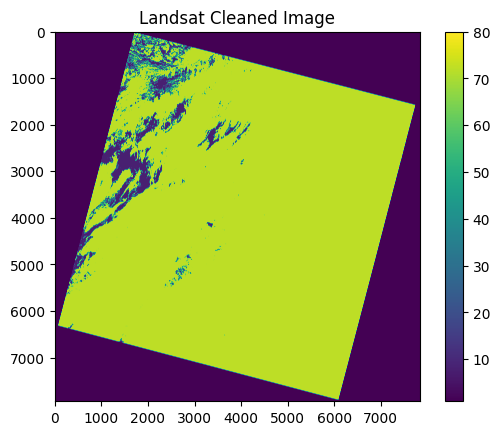

In [20]:
# Visualize cleaned images for validation
plt.figure()
plt.imshow(landsat[0], cmap='viridis')
plt.title('Landsat Cleaned Image')
plt.colorbar()
plt.show()

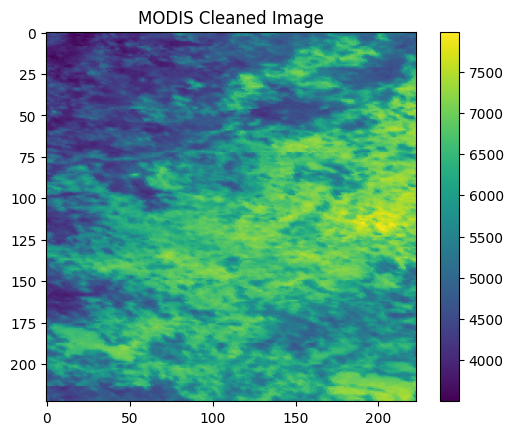

In [21]:
plt.figure()
plt.imshow(modis, cmap='viridis')
plt.title('MODIS Cleaned Image')
plt.colorbar()
plt.show()


Rasterio Dataset Info:
{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 223, 'height': 223, 'count': 2, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'), 'transform': Affine(0.004491576420597608, 0.0, -115.50088765566748,
       0.0, -0.004491576420597608, 54.50078828753137), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}
Data shape: (223, 223)


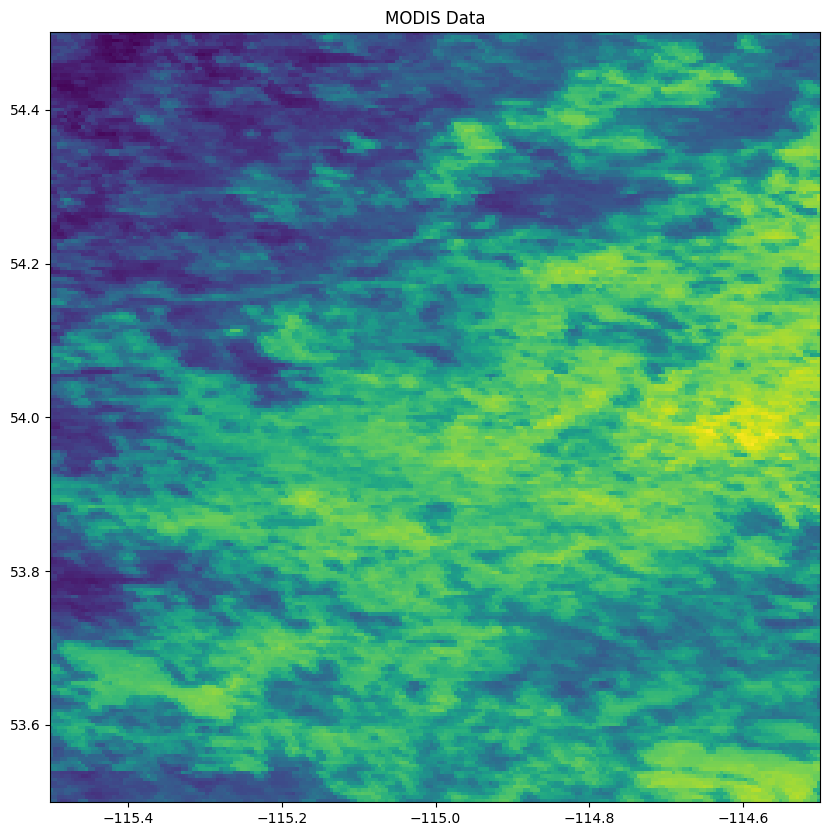

Rasterio Dataset Info:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 7841, 'height': 7941, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 19N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-69],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32619"]]'), 'transform': Affine(30.0, 0.0, 444285.0,
       0.0, -30.0, 5688915.0), 'blockxsize': 7841, 'blockysize': 1, 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}
Data shape: (7941, 7841)


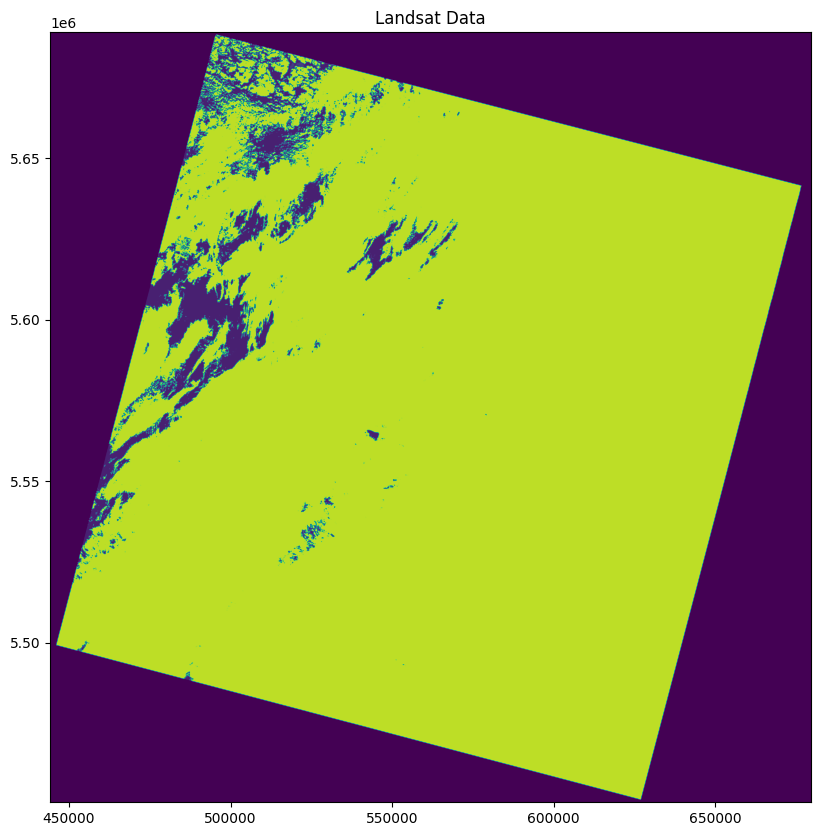

In [ ]:

def load_raster_data(file_path):
    try:
        # Open the dataset using Rasterio
        with rasterio.open(file_path) as src:
            print("Rasterio Dataset Info:")
            print(src.profile)  # Display original profile
            # Read the data
            data = src.read(1)  # Read the first band
            print(f"Data shape: {data.shape}")
            return data, src.profile, src.transform
    except rasterio.errors.RasterioIOError as e:
        print(f"Error opening the file: {e}")
        return None, None, None

def plot_raster_data(data, transform, title='Raster Data'):
    fig, ax = plt.subplots(figsize=(10, 10))
    show(data, transform=transform, ax=ax, cmap='viridis')
    ax.set_title(title)
    plt.show()

def main():
    # Set the correct path to the MODIS and Landsat datasets in Google Colab
    modis_file_path = '/content/Dataset 2_fixed.tif'  # Update with your actual file path in Google Drive
    landsat_file_path = '/content/Dataset_fixed.tif'  # Update with your actual file path in Google Drive

    # Check if the file paths exist
    if not os.path.exists(modis_file_path):
        print(f"MODIS file not found at: {modis_file_path}")
        return

    if not os.path.exists(landsat_file_path):
        print(f"Landsat file not found at: {landsat_file_path}")
        return

    # Load MODIS dataset
    modis_data, modis_profile, modis_transform = load_raster_data(modis_file_path)

    if modis_data is not None:
        plot_raster_data(modis_data, modis_transform, title="MODIS Data")

    # Load Landsat dataset
    landsat_data, landsat_profile, landsat_transform = load_raster_data(landsat_file_path)

    if landsat_data is not None:
        plot_raster_data(landsat_data, landsat_transform, title="Landsat Data")

if __name__ == "__main__":
    main()


In [8]:
# Function to clean TIFF files
def clean_tiff(path):
    with rasterio.open(path) as src:
        profile = src.profile
        data = src.read()

        if "extra_samples" in profile:
            profile.pop("extra_samples", None)

        profile.update(dtype='float32', count=data.shape[0])

    cleaned_path = path.replace('.tif', '_cleaned.tif')
    with rasterio.open(cleaned_path, 'w', **profile) as dst:
        dst.write(data.astype('float32'))
    return cleaned_path

# Load datasets
def load_datasets(landsat_path, modis_path):
    with rasterio.open(landsat_path) as src:
        landsat = src.read()
    with rasterio.open(modis_path) as src:
        modis = src.read(1)
    return landsat, modis

# Kalman filter for a single patch
def kalman_filter_patch(landsat_patch, modis_patch, steps=3):
    h, w = landsat_patch.shape[1:]
    state_dim = h * w

    # Initialize Kalman filter parameters
    x = landsat_patch.mean(axis=0).flatten()  # Initial state: average of Landsat bands
    P = np.eye(state_dim) * 1e-1
    Q = np.eye(state_dim) * 1e-4
    R = np.eye(state_dim) * 1e-2
    H = np.eye(state_dim)
    F = np.eye(state_dim)
    z = modis_patch.flatten()

    # Kalman filter iterations
    for _ in range(steps):
        # Predict
        x = F @ x
        P = F @ P @ F.T + Q

        # Update
        y = z - H @ x
        S = H @ P @ H.T + R
        K = P @ H.T @ np.linalg.inv(S)
        x = x + K @ y
        P = P - K @ H @ P

    return x.reshape((h, w))

# Sequential patch-based fusion
def kalman_fusion_sequential(landsat, modis, patch_size=100, steps=3):
    h, w = landsat.shape[1:]
    fused_image = np.zeros_like(landsat[0])  # Assuming single-band output

    # Process patches sequentially
    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            landsat_patch = landsat[:, i:i+patch_size, j:j+patch_size]
            modis_patch = resize(modis, landsat_patch.shape[1:], mode='reflect', anti_aliasing=True)
            fused_patch = kalman_filter_patch(landsat_patch, modis_patch, steps)
            fused_image[i:i+patch_size, j:j+patch_size] = fused_patch

    return fused_image

# Main Execution
landsat_path = '/content/Dataset.tif'
modis_path = '/content/Dataset 2.tif'

# Clean TIFF files
landsat_cleaned = clean_tiff(landsat_path)
modis_cleaned = clean_tiff(modis_path)

# Load datasets
landsat, modis = load_datasets(landsat_cleaned, modis_cleaned)

# Perform sequential Kalman filter fusion
patch_size = 100  # Smaller patch size for reduced memory use
steps = 3  # Reduce Kalman steps for speed
fused_image = kalman_fusion_sequential(landsat, modis, patch_size, steps)

# Display fused image
plt.figure()
plt.imshow(fused_image, cmap='viridis')
plt.title('Fused Image (Sequential Kalman Filter)')
plt.colorbar()
plt.show()

